# Sprawozdanie z Laboratorium 4
## Autorzy: Mateusz Pawliczek, Piotr Świerzy  
## Data: 08.04.2025

## Zadanie 1

Celem zadania było wykonanie aproksymacji średniokwadratowej punktowej dla populacji Stanów Zjednoczonych w latach 1900 - 1980 używając do tego wielomianó stopnia m z przedziału [0 - 6].

Do wykonania zadania zolstała użyta baza danych populacji USA w wybranych latach:

| Rok  | Populacja      |
|------|--------------:|
| 1900 |  76,212,168  |
| 1910 |  92,228,496  |
| 1920 | 106,021,537  |
| 1930 | 123,202,624  |
| 1940 | 132,164,569  |
| 1950 | 151,325,798  |
| 1960 | 179,323,175  |
| 1970 | 203,302,031  |
| 1980 | 226,542,199  |



### Implementacja programju do aproksymacji (Pdpkt A)

Pierwszym krokiem było zaimplementowanie potrzebnych do realizacji zadania bibliotek matematycznych oraz danych wejściowych

In [24]:
import numpy as np

# Data: Population of the USA
x = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980]
y = [76000000, 92000000, 106000000, 123000000, 132000000,
     151000000, 179000000, 203000000, 227000000]

# Data: Population of USA in 1990
predict_year = 1990
true_value = 248709873

Następnie zostały zaimplementowane funkcje obliczające odpowiednie wartości wymagane do wykonania aproksymacji. Wzór ogólny do przeporwadzenia aproksymacji:

![image](./assets/wzory.png)

Wzory na Sk, Tk oraz macierze S i T zostały zaimplementowane w następującej formie:

In [25]:
def calculate_product(x, k):
    return sum([x_val ** k for x_val in x])

def calculate_result(x, y, k):
    return sum([x[i]**k * y[i] for i in range(len(x))])

def calculate_matrix_S(x, m):
    matrix = np.zeros((m + 1, m + 1))
    for i in range(m + 1):
        for j in range(m + 1):
            matrix[i][j] = calculate_product(x, i + j)
    return matrix

def calculate_matrix_T(x, y, m):
    matrix = np.zeros((m + 1, 1))
    for i in range(m + 1):
        matrix[i][0] = calculate_result(x, y, i)
    return matrix

Zostałą również stworzona funkcja która aproksymuje wartość w danym punkcie x

In [26]:
def predict(c, x_val):
    return sum([c[i][0] * x_val**i for i in range(len(c))])

Finalnie podstawiając macierze i wyznaczając z nich współczynniki jesteśmy w stanie dokonać aproksymacji populacji w USA na rok 1990 i porównać wyniki dla każdego z m = [0 .. 6] (wyniki aproksymacji oraz ich porównanie zostanie pokazane razem z rozwiązaniem pdpkt b)

### Wykorzystanie kryterium inf. Akaikego (Pdpkt B)

Podpunkt b) polegał na implementacji dodatkowego współczynnika, którym jest kryterium informacyjne Akaikego. Służy ono do wyboru optymalnego stopnia wielomianu, który jest najmniej potencjalny na błędy oraz szum.

Współczynnik AIC wyznacza się ze wzoru:

![image](./assets/wzor_AIC_1.png)

Ze względu na niewielką próbkę dodatkowo uwzględnia się skłądnik korygujący:

![image](./assets/wzor_AIC_2.png)

### Implementacja funkcji wyznaczającej AIC

Implementacja wyznaczania współczynnika AIC została zawarta w pętli wyznaczającej aproksymacje dla m = [0 .. 6]. Ostateczne implementacja oraz wyniki podpunktu a) oraz b):

In [27]:
from math import inf
best_error = inf
best_aicc = inf 

for m in range(7):
    S = calculate_matrix_S(x, m)
    T = calculate_matrix_T(x, y, m)
    c = np.linalg.solve(S, T)

    y_pred = predict(c, predict_year)
    relative_error = abs(y_pred - true_value) / true_value * 100

    if relative_error < best_error:
        best_error = relative_error
        best_degree_err = m

    print(f"Stopień {m}:")
    print(f"  Przewidziana populacja w 1990: {int(y_pred)}")
    print(f"  Błąd względny: {relative_error:.4f}%")

    k = m + 1
    n = len(x)

    rss = sum([(y[i] - predict(c, x[i]))**2 for i in range(n)])

    aic = 2*k + n * np.log(rss/n)
    aicc = aic + 2*k*(k+1) / (n-k-1)

    if aicc < best_aicc:
        best_aicc = aicc
        best_degree_aicc = m

    print(f"  AICc: {aicc:.4f}\n")

print(f"Najlepszy stopień według AICc: {best_degree_aicc} (AICc = {best_aicc:.4f})\n")
print(f"Najlepszy stopień według błędu: {best_degree_err} (Błąd względny = {best_error:.4f}%)\n")


Stopień 0:
  Przewidziana populacja w 1990: 143222222
  Błąd względny: 42.4139%
  AICc: 321.0442

Stopień 1:
  Przewidziana populacja w 1990: 235805555
  Błąd względny: 5.1885%
  AICc: 289.3420

Stopień 2:
  Przewidziana populacja w 1990: 255071428
  Błąd względny: 2.5578%
  AICc: 279.5179

Stopień 3:
  Przewidziana populacja w 1990: 262626681
  Błąd względny: 5.5956%
  AICc: 284.4356

Stopień 4:
  Przewidziana populacja w 1990: 277939806
  Błąd względny: 11.7526%
  AICc: 303.3790

Stopień 5:
  Przewidziana populacja w 1990: 277522413
  Błąd względny: 11.5848%
  AICc: 327.2685

Stopień 6:
  Przewidziana populacja w 1990: 251377030
  Błąd względny: 1.0724%
  AICc: 387.7665

Najlepszy stopień według AICc: 2 (AICc = 279.5179)

Najlepszy stopień według błędu: 6 (Błąd względny = 1.0724%)



## Wnioski do podpunktu B

### Czemu najniższy błąd względny jest przy \( m = 6 \)?

Wielomian 6. stopnia ma aż 7 parametrów (bo \( k = m + 1 = 7 \)), więc może **idealnie dopasować się** do 9 punktów danych.

To prowadzi do **bardzo niskiego błędu na znanych danych** – ale nie oznacza, że dobrze poradzi sobie z nowymi (czyli nieznanymi) danymi, np. prognozowaniem populacji w przyszłości.

Zjawisko to nazywamy **przeuczeniem (overfittingiem)** – model nauczył się szumu zamiast trendu.

---

### Czemu najlepszy AICc jest przy \( m = 2 \)?

AICc nie patrzy tylko na dopasowanie, ale także **karze za złożoność modelu**.

Dzięki temu wybiera taki stopień wielomianu, który **dobrze dopasowuje dane, ale nie jest zbyt skomplikowany**.

Przy małej próbce (jak tutaj: tylko 9 punktów), AICc **szczególnie mocno penalizuje nadmiar parametrów**.


## Zadanie 2

Celem zadanie drugiego było wykonanie aproksymacji średniokwadratowej funkcji:

```math
f(x) = \sqrt{x}
```

używając przy tym wielomianów Czebyszewa. Do wyznaczenia oraz przedstawienia funkcji na wykresie skorzystano z bilbioteki pyplot do rysowania wykresów oraz z funkcji Chebyshev implementowanej przez bibliotekę numpy.

In [28]:
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

W realizacji zadanie drugiego zostały wprowadzone funkcje:

In [29]:
def g(x):
    return np.sqrt(x + 1)

def T(k, x):
    if k==0:
        return np.ones_like(x)
    elif k==1:
        return x
    elif k==2:
        return 2 * x**2 - 1

Ostateczna realizacja zadania polegała na wyznaczeniu metodą Czebysheva wielomianu stopnia drugiego, dokonanie aproksymacji i narysowania wykresu:

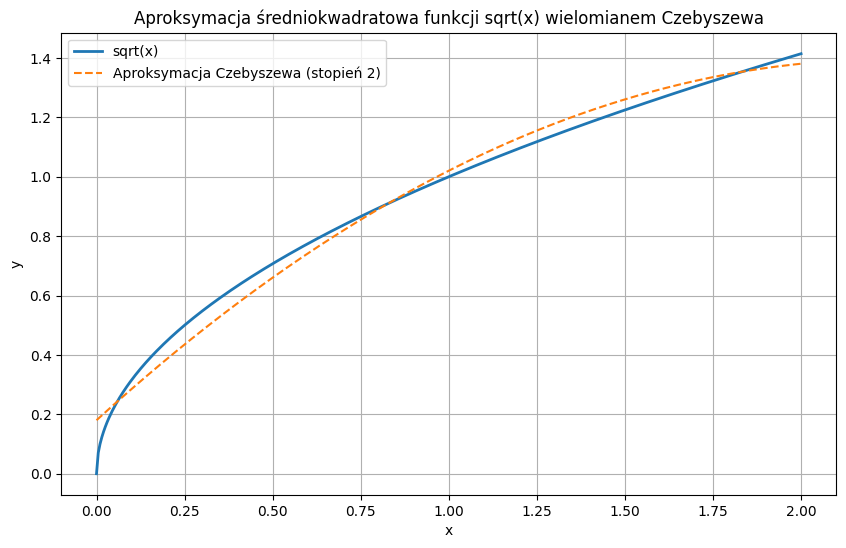

Współczynniki w bazie Czebyszewa:
c_0 = 0.900326
c_1 = 0.600192
c_2 = -0.120024


In [30]:
n_points = 100
k = np.arange(1, n_points + 1)
x_cheb = np.cos((2*k - 1) * np.pi / (2*n_points))
w_cheb = np.pi / n_points

coeffs = []

for i in range (3):
    integ = g(x_cheb) * T(i, x_cheb)
    if i==0:
        c = (1/np.pi) * np.sum(integ) * w_cheb
    else:
        c = (2/np.pi) * np.sum(integ) * w_cheb
    coeffs.append(c)

cheb_poly = Chebyshev(coeffs, domain = [-1, 1])

x_vals = np.linspace(0, 2, 400)
t_vals = x_vals - 1
approx_vals = cheb_poly(t_vals)
true_vals = np.sqrt(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, true_vals, label="sqrt(x)", linewidth=2)
plt.plot(x_vals, approx_vals, label="Aproksymacja Czebyszewa (stopień 2)", linestyle="--")
plt.title("Aproksymacja średniokwadratowa funkcji sqrt(x) wielomianem Czebyszewa")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

print("Współczynniki w bazie Czebyszewa:")
for i, c in enumerate(coeffs):
    print(f"c_{i} = {c:.6f}")

## Wnioski zadanie 2

Porównując wykresy funkcji f(x) z wielomianem ją przybliżającą możemy stwierdzić, że używając wielomianów Czebyszewa faktycznie zyskujemy na czasie związanym z obliczeniami, ale tracimy na precyzji. Może to też jednak wynikać z faktu ograniczenia wielomianu tylko do stopnia 2.